Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/users/rahulkp/downloads/50_startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data=data.rename({'R&D Spend':'RD','Administration':'ADMN','Marketing Spend':'MS','State':'STATE','Profit':'PROFIT'},axis=1)
data

,RD,ADMN,MS,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   ADMN    50 non-null     float64
 2   MS      50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [8]:
data[data.duplicated()]

,RD,ADMN,MS,STATE,PROFIT


In [12]:
data.describe()

,RD,ADMN,MS,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Matrix

In [13]:
data.corr()

,RD,ADMN,MS,PROFIT
RD,1.000000,0.241955,0.724248,0.972900
ADMN,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

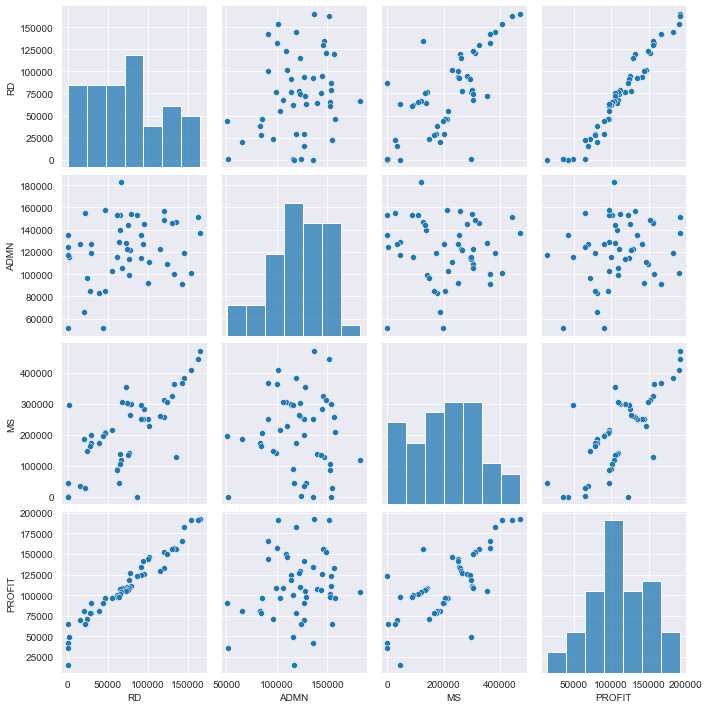

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Preparing Model

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols('PROFIT~RD+ADMN+MS',data=data).fit()

In [17]:
model.rsquared

0.9507459940683246

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        10:42:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADMN          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# co-efficients
model.params

Intercept    50122.192990
RD               0.805715
ADMN            -0.026816
MS               0.027228
dtype: float64

In [22]:
#T and P-values
model.tvalues,'\n',np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 ADMN         -0.525507
 MS            1.655077
 dtype: float64,
 '\n',
 Intercept    0.00000
 RD           0.00000
 ADMN         0.60176
 MS           0.10472
 dtype: float64)

In [24]:
# R-square and adjusted R-square value
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

we build simple linear regression model for these insignificant values ADMN and MS as specified by the model

# Simple Linear Regression Models

In [26]:
model1=smf.ols('PROFIT~ADMN',data=data).fit()

In [27]:
#t and P-values
model1.tvalues,'\n',model1.pvalues

(Intercept    3.040044
 ADMN         1.419493
 dtype: float64,
 '\n',
 Intercept    0.003824
 ADMN         0.162217
 dtype: float64)

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.162
Time:                        10:54:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMN           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model2=smf.ols('PROFIT~MS',data=data).fit()

In [33]:
#t and P-values
model2.tvalues,'\n',np.round(model2.pvalues,4)

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 '\n',
 Intercept    0.0
 MS           0.0
 dtype: float64)

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           4.38e-10
Time:                        10:56:45   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model3=smf.ols('PROFIT~ADMN+MS',data=data).fit()

In [37]:
#t and P-values
model3.tvalues,'\n',np.round(model3.pvalues,5)

(Intercept    1.142741
 ADMN         2.467779
 MS           8.281039
 dtype: float64,
 '\n',
 Intercept    0.25893
 ADMN         0.01729
 MS           0.00000
 dtype: float64)

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.50e-10
Time:                        10:58:31   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADMN           0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [40]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_rd=smf.ols('RD~ADMN+MS',data=data).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_admn=smf.ols('ADMN~RD+MS',data=data).fit().rsquared
vif_admn=1/(1-rsq_admn)

rsq_ms=smf.ols('MS~RD+ADMN',data=data).fit().rsquared
vif_ms=1/(1-rsq_ms)

# Storing vif values in a data frame
d1={'VARIABLES':['RD','ADMN','MS'],'VIF':[vif_rd,vif_admn,vif_ms]}
vif_df=pd.DataFrame(d1)
vif_df

,VARIABLES,VIF
0,RD,2.468903
1,ADMN,1.175091
2,MS,2.326773


none of the variables has a VIF>20 . So all the parameters has to be considered

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)¶

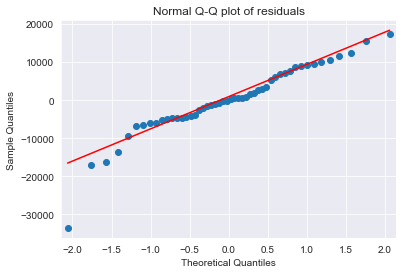

In [42]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')# line = 45 to draw the diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [43]:
list(np.where(model.resid<-30000))

[array([49])]

# Residual plot for Homoscedasticity

In [47]:
def get_standardized_values(vals):
    return(vals-vals.mean())/(vals.std())

Text(0, 0.5, 'Standardized Residual values')

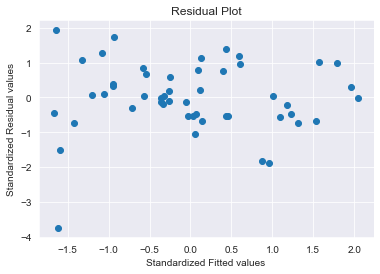

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')

Here the plots are completely scattered,which means they dont have any relationship

# Residuals vs Regressors

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

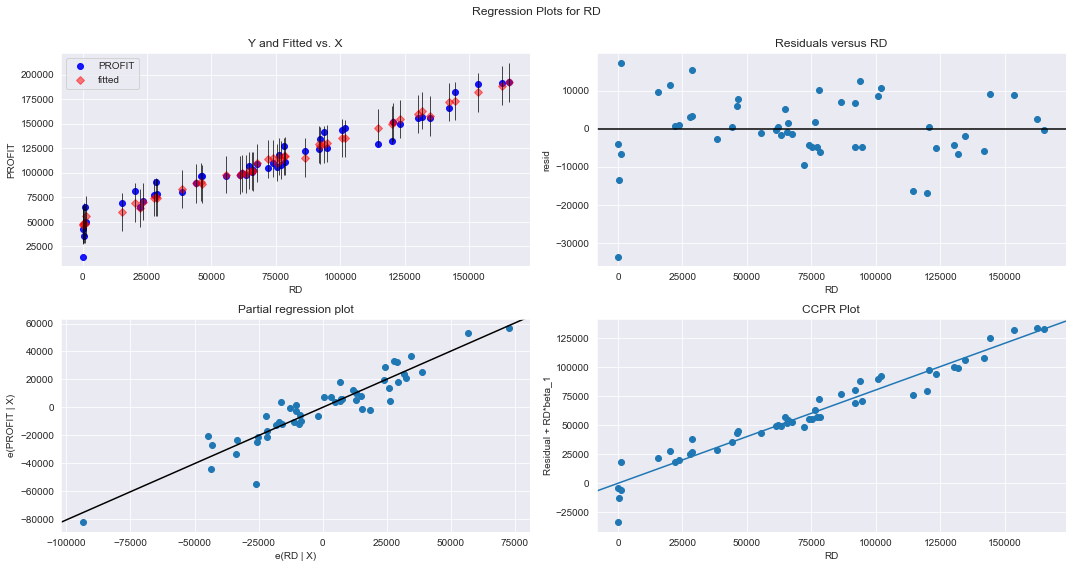

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


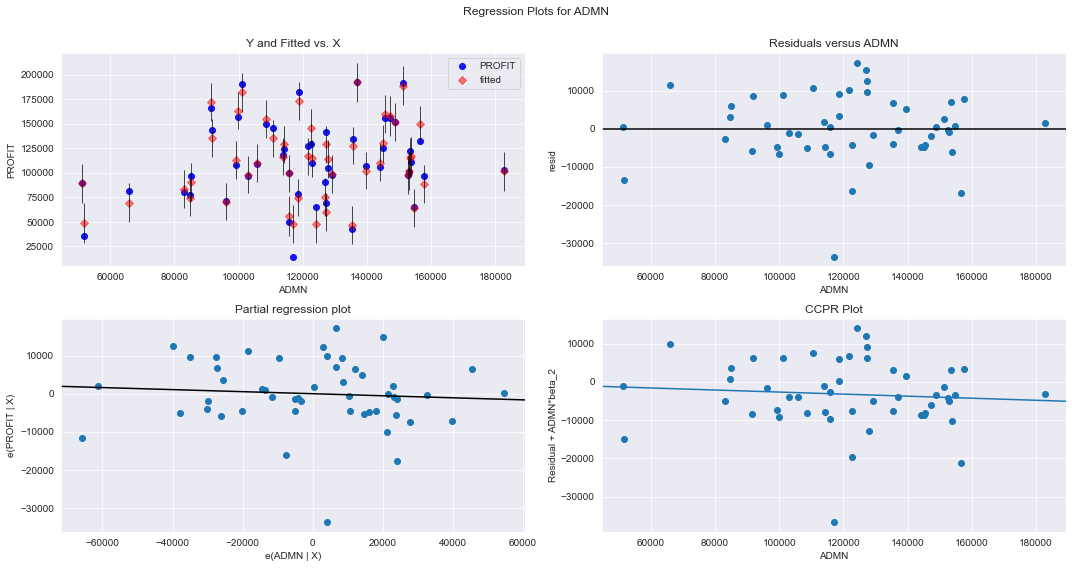

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ADMN',fig=fig)
plt.show()

eval_env: 1


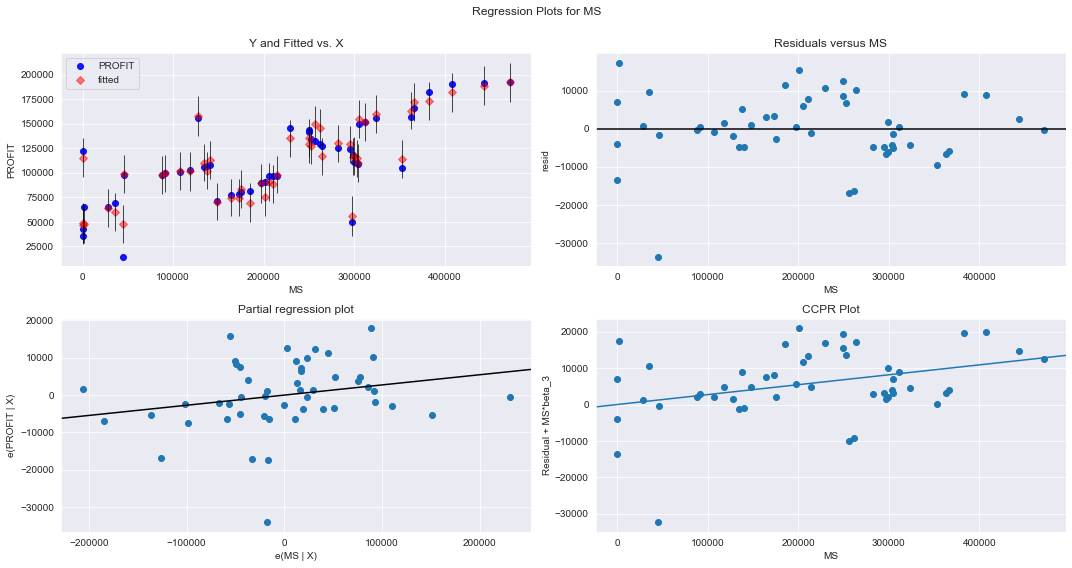

In [53]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook's Distance

In [54]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

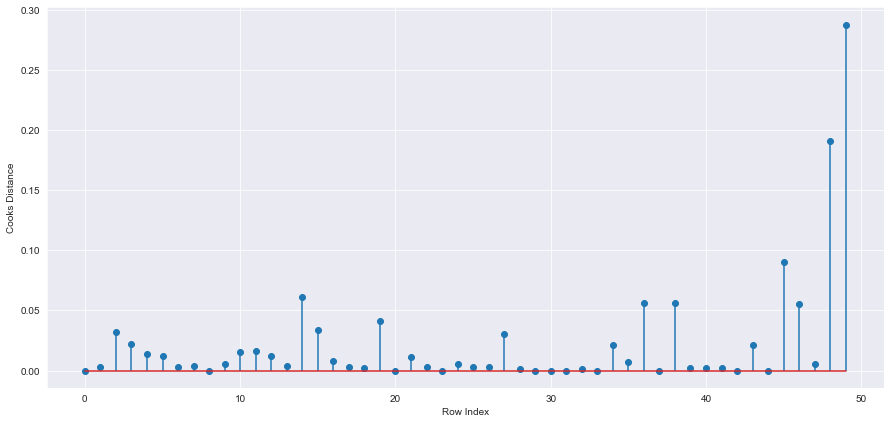

In [58]:
# plotting the influencers values using stem plot
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
# index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence Points

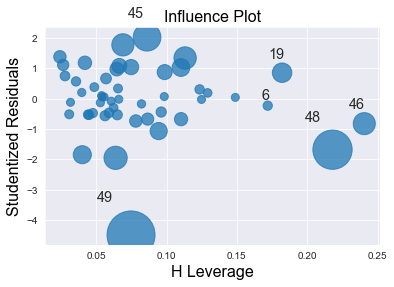

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [66]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff= 3*((k+1))/n
leverage_cutoff

0.36

from the above plot it is evident that the data point 49 is influencer

In [89]:
data[data.index.isin([49])]

,RD,ADMN,MS,STATE,PROFIT
49,0.0,116983.8,45173.06,California,14681.4


# improving model

In [85]:
data1=data.copy()
data1

,RD,ADMN,MS,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [90]:
# discarding the data point which is influencer and re-asigning the row number
data1=data1.drop(data1.index[49],axis=0).reset_index(drop=True)
data1

,RD,ADMN,MS,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [91]:
final_model=smf.ols('PROFIT~RD+ADMN+MS',data=data1).fit()

In [92]:
final_model.rsquared,final_model.aic

(0.9613162435129847, 1020.5652974526367)

Now The model Accuracy is improved to 96.13%

# Model Predictions

In [94]:
# new data points
new_data=pd.DataFrame({'RD':85000.50,'ADMN':75000.40,'MS':240000.15},index=[0])
new_data

,RD,ADMN,MS
0,85000.5,75000.4,240000.15


In [102]:
# Manual Prediction of Price
final_model.predict(new_data)


0    123328.952182
dtype: float64

In [109]:
#prediction for the data with removal of outliers/influencers
a=final_model.predict(data1)
b=pd.DataFrame(a)
b
b=b.rename({0: 'NEW PRICE'}, axis=1)
b

,NEW PRICE
0,190716.676999
1,187537.122227
2,180575.526396
3,172461.144642
4,170863.486721
5,162582.583177
6,157741.338633
7,159347.735318
8,151328.826941
9,154236.846778


# Table containing R-Squared value for each prepared model

In [112]:
df=pd.DataFrame({'Created models':['model','final_model'],'R-Square values':[model.rsquared,final_model.rsquared]})
df

,Created models,R-Square values
0,model,0.950746
1,final_model,0.961316
